## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score

## LOADING AND UNDERSTANDING THE DATA

In [3]:
df=pd.read_csv('/content/card_transdata1.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [4]:
df.describe().style.background_gradient(cmap="plasma")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


Correlation Heatmap

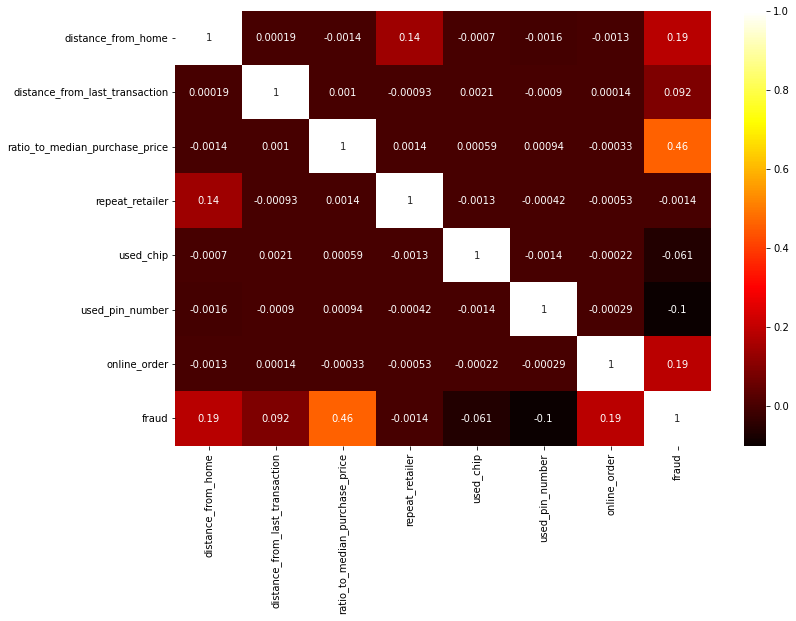

In [6]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot= True, cmap="hot")

0    912597
1     87403
Name: fraud, dtype: int64

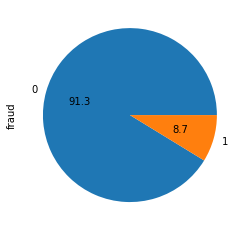

In [7]:
#Class Distribution

df['fraud'].value_counts().plot.pie(autopct = "%.1f")
df['fraud'].value_counts()

Under-sampling (Down Sampling)

In [8]:
real = df[df['fraud']==0]
fraud=df[df['fraud']==1]

real_sample=real.sample(n=87403, random_state=42)
fraud_sample=fraud.sample(n=87403, random_state=42)

data=pd.concat([real_sample,fraud_sample],axis=0)

0    87403
1    87403
Name: fraud, dtype: int64

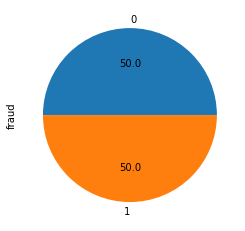

In [9]:
data['fraud'].value_counts().plot.pie(autopct = "%.1f")
data['fraud'].value_counts()

## MODEL BUILDING

In [10]:
x=np.array(data.drop(columns='fraud'))
y=np.array(data['fraud'])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123,shuffle=True)

In [12]:
x_train.shape

(139844, 7)

In [13]:
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

K-Nearest Neighbors Classifier

In [14]:
train_accuracy=[]
test_accuracy=[]

for k in range(3,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_prd=knn.predict(x_test)

  train_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))

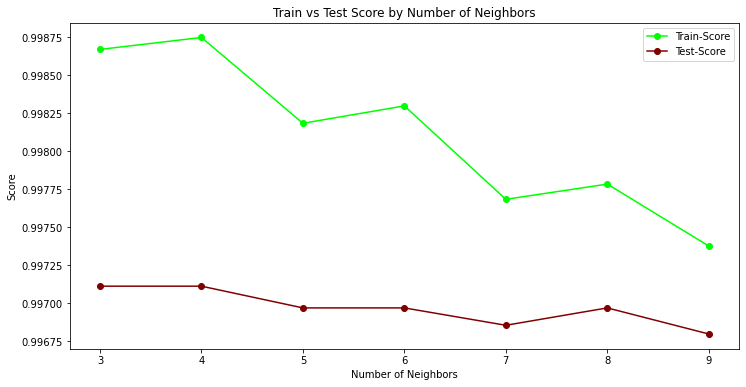

In [15]:
plt.figure(figsize=(12,6))

plt.plot(range(3,10),train_accuracy,label="Train-Score",marker="o",color="lime")
plt.plot(range(3,10),test_accuracy,label="Test-Score",marker="o",color="maroon")

plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Train vs Test Score by Number of Neighbors")
plt.legend()
plt.show()

Accuracy of the model decreases as k increases from 4 onwards. Using k=4 for best performance.

In [16]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [17]:
precision_score(y_test,y_pred)

0.9965104971111493

In [18]:
confusion_matrix(y_test,y_pred)

array([[17441,    61],
       [   40, 17420]])

In [19]:
print("KNN accuracy: ",knn.score(x_test,y_test))
print("\n",classification_report(y_test,y_pred))

KNN accuracy:  0.9971111492477547

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17502
           1       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



Decision Tree Classifier

In [20]:
dt=DecisionTreeClassifier(random_state=5)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [21]:
confusion_matrix(y_test,y_pred)

array([[17502,     0],
       [    1, 17459]])

In [22]:
precision_score(y_test,y_pred)

1.0

In [23]:
print("Decison Tree Accuracy: ",dt.score(x_test,y_test))
print(classification_report(y_test,y_pred))

Decison Tree Accuracy:  0.9999713975173045
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17502
           1       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962




Random Forest Classifier

In [24]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[17501,     1],
       [    1, 17459]])

In [26]:
precision_score(y_test,y_pred)

0.999942726231386

In [27]:
print("Random Forest Classifier Accuracy : ", rf.score(x_test,y_test))
print(classification_report(y_test,y_pred))

Random Forest Classifier Accuracy :  0.999942795034609
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17502
           1       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962

